<a href="https://colab.research.google.com/github/MMB019/Projet/blob/main/IAtitanic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [93]:
from google.colab import drive

In [94]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
titanic=pd.read_excel("/content/drive/MyDrive/titanic.xls")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Traitement préleminaire

In [96]:
columns=titanic.columns
columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [97]:
columns=columns.drop(['pclass','survived','sex','age'])
columns

Index(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat',
       'body', 'home.dest'],
      dtype='object')

In [98]:
titanic.drop(columns,axis=1,inplace=True)
titanic.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [99]:
titanic.isna().sum()

pclass        0
survived      0
sex           0
age         263
dtype: int64

In [100]:
titanic.dropna(axis=0,inplace=True)
titanic.isna().sum()

pclass      0
survived    0
sex         0
age         0
dtype: int64

In [101]:
variable_qualitative=titanic.select_dtypes('O').columns
variable_qualitative

Index(['sex'], dtype='object')

In [102]:
variable_quantitative=titanic.columns.drop(variable_qualitative)
variable_quantitative

Index(['pclass', 'survived', 'age'], dtype='object')

## Analyse des données 

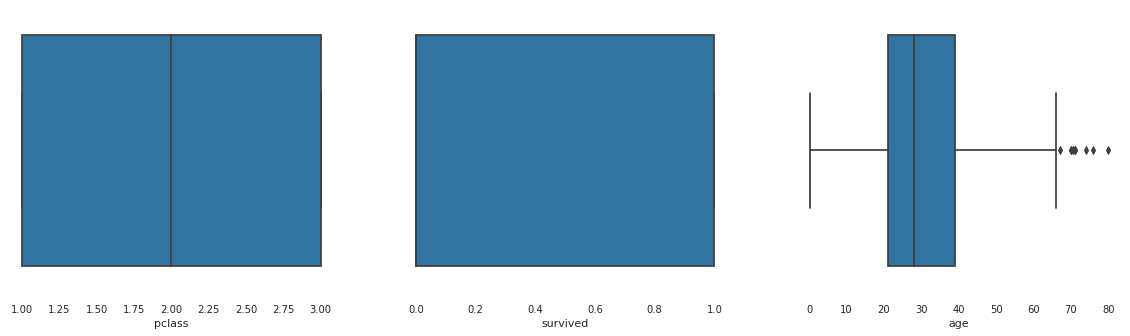

In [103]:
plt.figure(figsize=(20,18))
for i,col in enumerate(variable_quantitative):
  plt.subplot(3,3, i+1)
  sns.boxplot(x=col, data=titanic)

plt.show()

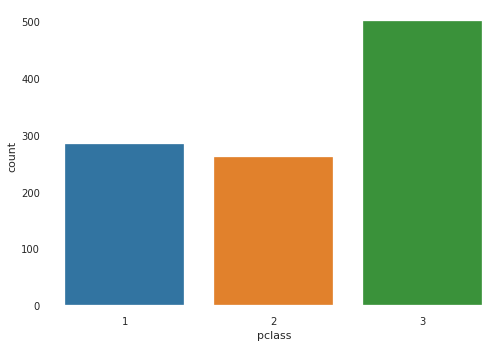

In [104]:
sns.countplot(x="pclass", data=titanic)

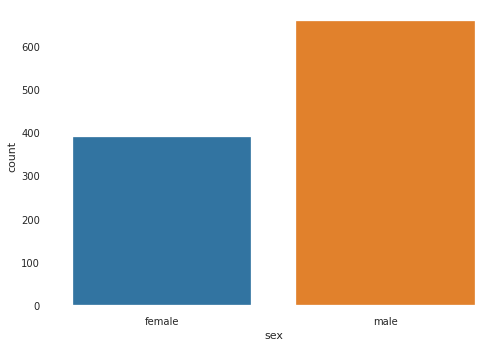

In [105]:
sns.countplot(x="sex",data=titanic)

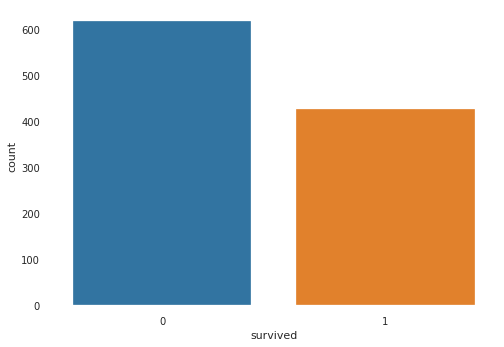

In [106]:
sns.countplot(x="survived",data=titanic)

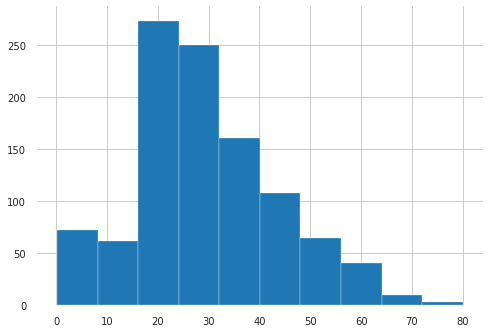

In [107]:
titanic['age'].hist()

In [108]:
titanic_corr=titanic.corr()
titanic_corr

,pclass,survived,age
pclass,1.000000,-0.320486,-0.408106
survived,-0.320486,1.000000,-0.055513
age,-0.408106,-0.055513,1.000000


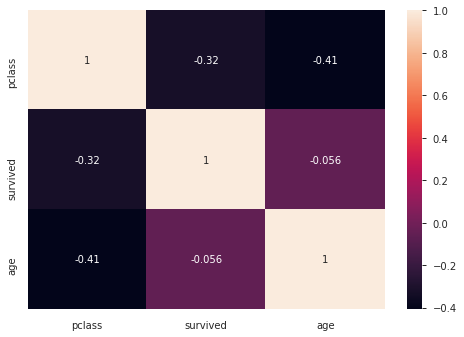

In [109]:
sns.heatmap(titanic_corr,annot=True)

# Créaction de l'IA

In [110]:
x=titanic.drop("survived",axis=1)
y=titanic['survived']
x.head()

,pclass,sex,age
0,1,female,29.0000
1,1,male,0.9167
2,1,female,2.0000
3,1,male,30.0000
4,1,female,25.0000


In [111]:
x['sex']=x['sex'].map({
    "female":0,
    "male":1
})
x.head()

,pclass,sex,age
0,1,0,29.0000
1,1,1,0.9167
2,1,0,2.0000
3,1,1,30.0000
4,1,0,25.0000


In [115]:

model=KNeighborsClassifier(n_neighbors=1)
model.fit(x,y)
model.score(x,y)



0.8432122370936902

In [116]:
def survivant(model, pclass=3, sex=1, age=24):
  X=np.array([pclass,sex,age]).reshape((1, 3))
  if model.predict(X)[0]==1:
    print("vous allez survivre !!!")
  else:
    print("vous allez pas survivre !!!")
  

In [117]:
#1=male et female=0
survivant(model,3, 0, 24)

vous allez survivre !!!


In [118]:
survivant(model)

vous allez pas survivre !!!
